<a href="https://colab.research.google.com/github/tsakailab/alpp/blob/main/colab/alpp_global_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 大域的な画像変換

拡大・縮小，回転，色の変換など，画像全体に対する処理は，画像のデータ集合の規模を疑似的に大きくする**データ拡張（data augmentation）**に用いられます．

|Original|Similarity|Rotation|Affine|
|-|-|-|-|
|![](https://upload.wikimedia.org/wikipedia/commons/e/ef/France_identique.gif)|![](https://upload.wikimedia.org/wikipedia/commons/6/64/France_par_rotation_180deg.gif)|![](https://upload.wikimedia.org/wikipedia/commons/4/47/France_par_similitude.gif)|![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/France_affine_%281%29.gif/240px-France_affine_%281%29.gif)



## まずは小さな濃淡画像で試します．

In [ ]:
#@title 手書き数字データセットMNISTを読み込みます．
#簡単のため，colabにsample_dataフォルダに用意されているファイルを使います．
import pandas as pd
mnist = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

lbl = mnist.iloc[:,0].to_numpy()
imgs = mnist.drop(columns=0).to_numpy().reshape(-1,28,28)
print("(#images, height, width) =", imgs.shape)

(#images, height, width) = (10000, 28, 28)


In [ ]:
i = 1127

Showing an image of digit 3 in shape (28, 28)


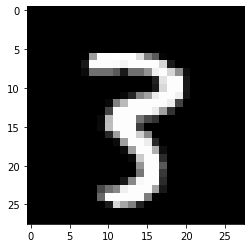

In [ ]:
#@title i 番目の手書き数字画像を表示します．
img = imgs[i]
print("Showing an image of digit", lbl[i], "in shape", img.shape)

import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

### Torchvisionのtransformsでいくつかの画像変換を設定します．

In [ ]:
import torch
from torchvision import transforms
transform = transforms.Compose(
    [
     transforms.RandomRotation((0, 0)),         # transforms.RandomRotation((-180, 180))
     transforms.Resize(int(img.shape[1])),      # transforms.Resize(int(target.shape[1]*0.5))
     transforms.RandomInvert(p=0.5),              # transforms.RandomInvert(p=1.)
     transforms.RandomHorizontalFlip(p=0),      # transforms.RandomHorizontalFlip(p=1)
     transforms.RandomVerticalFlip(p=0),        # transforms.RandomVerticalFlip(p=1)
     transforms.RandomPerspective(distortion_scale=0.5, p=1.0)  # distortion_scale=1,p=1.0 
])
print(transform)

Compose(
    RandomRotation(degrees=[0.0, 0.0], interpolation=nearest, expand=False, fill=0)
    Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
    RandomInvert(p=0.5)
    RandomHorizontalFlip(p=0)
    RandomVerticalFlip(p=0)
    RandomPerspective(p=1.0)
)


Input:  <class 'torch.Tensor'> torch.Size([1, 28, 28])
Output: <class 'torch.Tensor'> torch.Size([1, 28, 28])


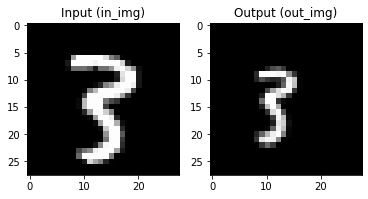

In [ ]:
#@title 画像変換を実行します．out_img = transform(in_img)
in_img = torch.tensor(img).unsqueeze(0).float()
out_img = transform(in_img)

# (n, channels, height, width)
print("Input: ", type(in_img), in_img.shape)
print("Output:", type(out_img), out_img.shape)

plt.subplot(1,2,1)
plt.title("Input (in_img)")
plt.imshow(in_img[0].detach(), cmap='gray')

plt.subplot(1,2,2)
plt.title("Output (out_img)")
plt.imshow(out_img[0].detach(), cmap='gray')
plt.show()

## 次は，カラー画像で試します．

In [ ]:
#uri = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png"
uri = "http://matlab.izmiran.ru/help/toolbox/images/peppers.jpg"

(height, width, channels) = (384, 512, 3)


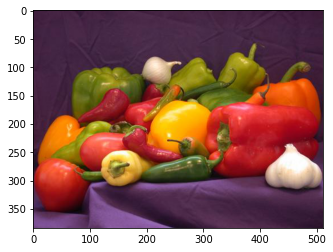

In [ ]:
#@title 画像をダウンロードして表示します．
import imageio
cimg = imageio.imread(uri)

print("(height, width, channels) =", cimg.shape)

import matplotlib.pyplot as plt
plt.imshow(cimg)
plt.show()

In [ ]:
import torch
from torchvision import transforms

# Detailed in https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose(
    [
     transforms.ColorJitter(
         brightness=0, contrast=0, saturation=0.1, hue=(-0.1,0.1)),
     transforms.RandomRotation((-20, 20)),         # transforms.RandomRotation((-180, 180))
     transforms.Resize((cimg.shape[0], cimg.shape[1])),   # transforms.Resize(int(target.shape[1]*0.5))
     transforms.RandomHorizontalFlip(p=0.5),      # transforms.RandomHorizontalFlip(p=1)
     transforms.RandomVerticalFlip(p=0),        # transforms.RandomVerticalFlip(p=1)
     #transforms.RandomPerspective(distortion_scale=0.5, p=1.0)  # distortion_scale=1,p=1.0 
])
print(transform)

Compose(
    ColorJitter(brightness=None, contrast=None, saturation=[0.9, 1.1], hue=(-0.1, 0.1))
    RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
    Resize(size=(384, 512), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0)
)


Input:  <class 'torch.Tensor'> torch.Size([1, 3, 384, 512])
Output: <class 'torch.Tensor'> torch.Size([1, 3, 384, 512])


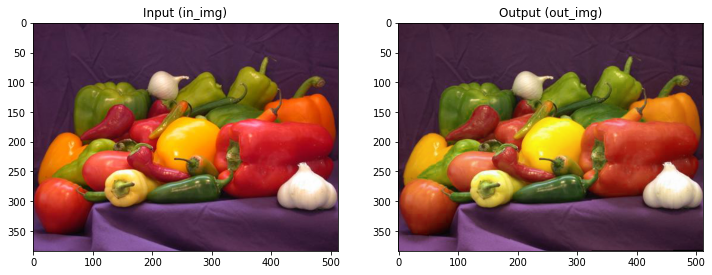

In [ ]:
#@title 画像変換を実行します．out_img = transform(in_img)
in_img = torch.tensor(cimg).permute(2,0,1).unsqueeze(0)
out_img = transform(in_img)

# (n, channels, height, width)
print("Input: ", type(in_img), in_img.shape)
print("Output:", type(out_img), out_img.shape)

plt.figure(figsize=(12,24))

plt.subplot(1,2,1)
plt.title("Input (in_img)")
plt.imshow(in_img[0].detach().permute(1,2,0).to(torch.int))

plt.subplot(1,2,2)
plt.title("Output (out_img)")
plt.imshow(out_img[0].detach().permute(1,2,0).to(torch.int))
plt.show()